In [1]:
# UNIXコマンドは!で打てたりする
!head -n 10 names/yob1880.txt

In [2]:
import pandas as pd
import numpy as np

names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:
# sexでまとめた上,birthsの総和を取る
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [4]:
# 提供されたファイルは年度ごとに別れているので、全部を一つの巨大なデータフレームにまとめてしまう
# pandas.concatを使う。
# 新たな列として、年も忘れずに追加しておく。

years = range(1880,2017)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [5]:
#とりあえずpiecesに突っ込んだデータフレームの配列を一つにまとめる。
#ignore_indexすると、各年度ファイルで振られていたオリジナル行番号が乗らなくなる。
#オリジナル行番号は要らないので捨てるため、Trueにしている。
names = pd.concat(pieces, ignore_index=True)

In [6]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [7]:
# year/sexでpivot table作成
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [8]:
total_births.tail()

sex,F,M
year,,
2012,1757328,1893134
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052


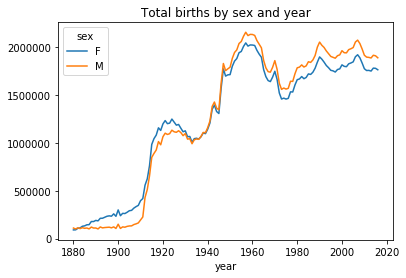

In [9]:
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [10]:
#出生率を求めてキーを追加する関数
def add_prop(group):
    #integer同士の除算は繰り上げされてしまうのでfloatにキャスト
    births = group.births.astype(float)
    group['prop'] = births /births.sum()
    return group

In [11]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [13]:
#ほんとに、グループ内の出生率の総和は1? -> Trueなので大丈夫。

np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

In [14]:
#年代・性別ごとの名前top1000は何かを見る。
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [15]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2016 M   1879004    Eliezer   M     211  2016  0.000112
         1879005      Gauge   M     211  2016  0.000112
         1879008     Konner   M     210  2016  0.000111
         1879006   Immanuel   M     210  2016  0.000111
         1879007      Keanu   M     210  2016  0.000111
         1879009    Benicio   M     209  2016  0.000111
         1879010      Brent   M     209  2016  0.000111
         1879011     Ernest   M     209  2016  0.000111
         1879012        Jad   M     209  2016  0.000111
         1879013       Lyle   M     208  2016  0.000110
         1879014    Merrick   M     208  2016  0.000110
         1879015      Amare   M     207  2016  0.000110
         1879016   Jamarion   M     207  2016  0.000110
         1879021     Maddux   M     206  2016  0.000109
         1879020      Krish   M     206  2016  0.000109
         1879019  Giancarlo   M     206  2016  0.000109
         1879018      Creed   M     206  2016  0.000109
         1879017     Camilo   M     206  2016  0.000109
         1879022      Anton   M     205  2016  0.000109
         1879023   Jonathon   M     205  2016  0.000109
         1879024      Steve   M     205  2016  0.000109
         1879025     Wesson   M     205  2016  0.000109
         1879026    Brenden   M     204  2016  0.000108
         1879027     Davian   M     204  2016  0.000108
         1879028      Jamar   M     204  2016  0.000108
         1879029   Jeremias   M     204  2016  0.000108
         1879030   Menachem   M     204  2016  0.000108
         1879031      Ralph   M     204  2016  0.000108
         1879032     Reagan   M     204  2016  0.000108
         1879035      Chevy   M     203  2016  0.000107

[273877 rows x 5 columns]

### 2.3.1. 名付けの傾向分析

In [16]:
boys = top1000[top1000.sex=='M']

In [17]:
girls = top1000[top1000.sex=='F']

In [18]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [19]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


In [20]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111845710>,
      dtype=object)

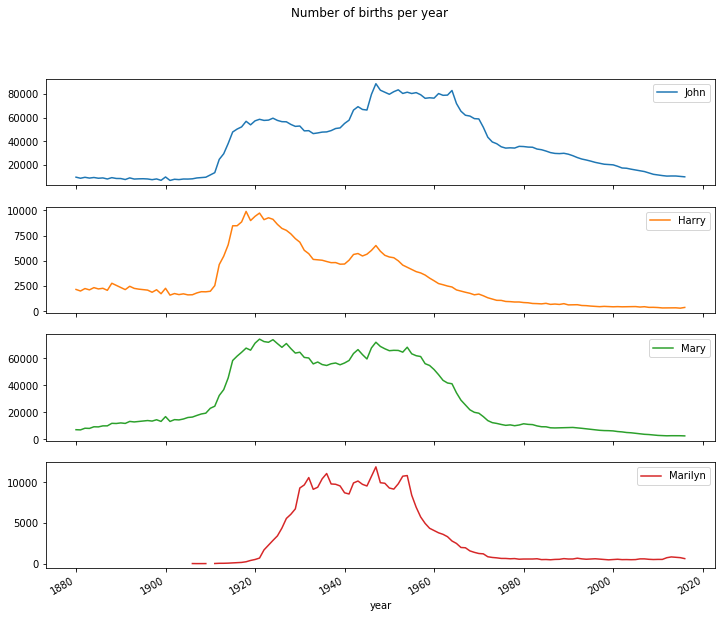

In [21]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

#### 2.3.1.1 多様化していく名付け

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


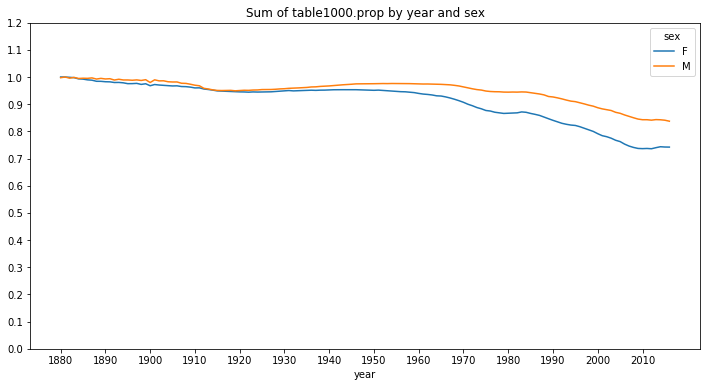

In [22]:
#先のグラフでは、近年の人口増加に対してJohnとかの名付けは減っていることがわかった。
#最近はみんなあまり一般的な名前をつけたがらないのでは？

#尺度の一つとして、上位1000県の名前がその年の名前全体に対して締める割合がどれだけなのかを見てみよう
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(figsize=(12,6),title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880,2020,10) )

In [23]:
#2010年の出生数の半分(50%)は、何種類の名前で構成されているだろうか？

df = boys[boys.year==2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1677731        Jacob   M   22117  2010  0.011544
         1677732        Ethan   M   18000  2010  0.009395
         1677733      Michael   M   17342  2010  0.009051
         1677734       Jayden   M   17171  2010  0.008962
         1677735      William   M   17048  2010  0.008898
         1677736    Alexander   M   16752  2010  0.008743
         1677737         Noah   M   16447  2010  0.008584
         1677738       Daniel   M   15836  2010  0.008265
         1677739        Aiden   M   15535  2010  0.008108
         1677740      Anthony   M   15487  2010  0.008083
         1677741       Joshua   M   15438  2010  0.008058
         1677742        Mason   M   14842  2010  0.007747
         1677743  Christopher   M   14273  2010  0.007450
         1677744       Andrew   M   14236  2010  0.007430
         1677745        David   M   14196  2010  0.007409
         1677746      Matthew   M   14126  2010  0.007373
         1677747        Logan   M   14019  2010  0.007317
         1677748       Elijah   M   13891  2010  0.007250
         1677749        James   M   13877  2010  0.007243
         1677750       Joseph   M   13825  2010  0.007216
         1677751      Gabriel   M   12873  2010  0.006719
         1677752     Benjamin   M   12428  2010  0.006487
         1677753         Ryan   M   11968  2010  0.006247
         1677754       Samuel   M   11959  2010  0.006242
         1677755      Jackson   M   11817  2010  0.006168
         1677756         John   M   11555  2010  0.006031
         1677757       Nathan   M   11372  2010  0.005935
         1677758     Jonathan   M   11121  2010  0.005804
         1677759    Christian   M   11095  2010  0.005791
         1677760         Liam   M   10927  2010  0.005703
...                       ...  ..     ...   ...       ...
         1678701       Lathan   M     203  2010  0.000106
         1678702      Ronaldo   M     203  2010  0.000106
         1678703         Yair   M     203  2010  0.000106
         1678705        Keyon   M     202  2010  0.000105
         1678706       Reagan   M     202  2010  0.000105
         1678704       Gibson   M     202  2010  0.000105
         1678710       Yehuda   M     201  2010  0.000105
         1678709        Talan   M     201  2010  0.000105
         1678708     Kingsley   M     201  2010  0.000105
         1678707       Daylen   M     201  2010  0.000105
         1678711    Cristofer   M     200  2010  0.000104
         1678712      Dashawn   M     200  2010  0.000104
         1678713       Jordon   M     200  2010  0.000104
         1678714      Sheldon   M     200  2010  0.000104
         1678715        Slade   M     200  2010  0.000104
         1678716     Clarence   M     199  2010  0.000104
         1678717       Dillan   M     199  2010  0.000104
         1678718        Kadin   M     199  2010  0.000104
         1678719        Masen   M     199  2010  0.000104
         1678720        Rowen   M     199  2010  0.000104
         1678723       Yousef   M     198  2010  0.000103
         1678722     Thaddeus   M     198  2010  0.000103
         1678721      Clinton   M     198  2010  0.000103
         1678724       Truman   M     197  2010  0.000103
         1678725       Bailey   M     196  2010  0.000102
         1678726       Destin   M     196  2010  0.000102
         1678727      Eliezer   M     196  2010  0.000102
         1678728        Enoch   M     196  2010  0.000102
         1678729       Joziah   M     196  2010  0.000102
         1678730      Keshawn   M     196  2010  0.000102

[1000 rows x 5 columns]

In [24]:
#この表を降順にソートした上で、何番目の名前で50%にたどり着くのかを調べる。ここではNumPyの関数Searchsortedを使ってみる

#cumsum: 累積和cumulative sum
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1677731    0.011544
           1677732    0.020939
           1677733    0.029990
           1677734    0.038952
           1677735    0.047850
           1677736    0.056594
           1677737    0.065178
           1677738    0.073443
           1677739    0.081552
           1677740    0.089635
Name: prop, dtype: float64

In [25]:
prop_cumsum.searchsorted(0.5)

#下の結果より、2010年では117番目で50%を迎える

array([116])

In [26]:
#1900年では25番目の名前ですでに50%。昔は名前の種類は在り来たりだった...

df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)

array([24])

In [27]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by="prop", ascending=False)
    return (group.prop.cumsum().searchsorted(q))[0] + 1

In [28]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


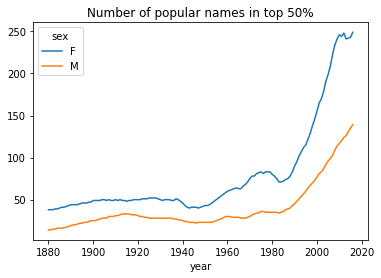

In [29]:
diversity.plot(title="Number of popular names in top 50%")

#### 2.3.1.2 名前「末尾一文字」の変化

In [30]:
#名前列から末尾文字を抽出
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [31]:
last_letters.head(5)

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [32]:
last_letters.tail(5)

1892191    n
1892192    h
1892193    r
1892194    l
1892195    n
Name: last_letter, dtype: object

In [33]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [34]:
# 1910,1960,2010のa,b,c,d,eで終わる赤ちゃんの数
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691250.0  676646.0    977.0    5212.0   28859.0
b                 NaN     694.0     455.0    411.0    3914.0   39264.0
c                 5.0      49.0     955.0    482.0   15460.0   23341.0
d              6751.0    3730.0    2640.0  22113.0  262136.0   44817.0
e            133600.0  435043.0  316665.0  28665.0  178785.0  130228.0

In [35]:
# 各年度を全出生数で割り、正規化する
print subtable.sum()
letter_prop = subtable / subtable.sum().astype(float)

sex  year
F    1910     396502.0
     1960    2022018.0
     2010    1774758.0
M    1910     194213.0
     1960    2132359.0
     2010    1915942.0
dtype: float64


In [36]:
import matplotlib.pyplot as plt

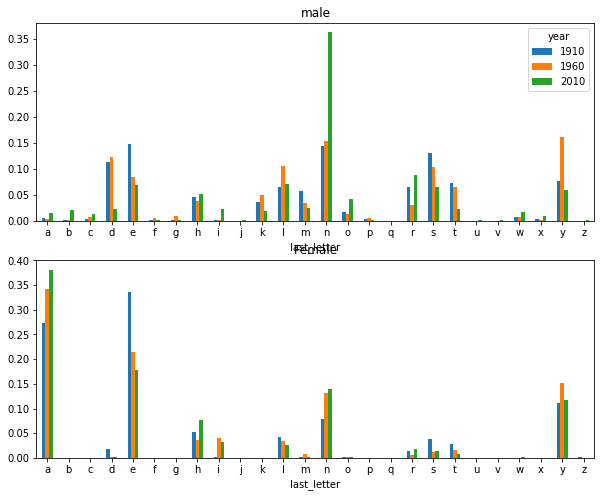

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [38]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T

In [39]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086122,0.149927,0.080408


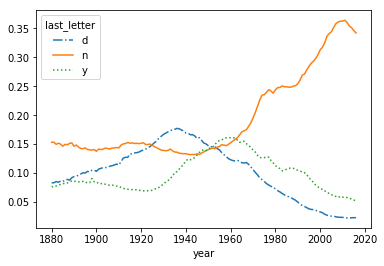

In [40]:
dny_ts.plot(style={'d':'-.', 'n':'-', 'y':':'})

#### 2.3.1.3 男の子の名前として定着した女の子の名前

In [41]:
# "lesl"の名前の種類を抽出

all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [42]:
# 名前がlesley_likeであるものをフィルタリングして表示

filtered = top1000[top1000.name.isin(lesley_like)]

In [43]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376860
Lesly      11432
Name: births, dtype: int64

In [44]:
filtered.head(10)

name sex  births  year      prop
year sex                                         
1880 F   654   Leslie   F       8  1880  0.000088
     M   1108  Leslie   M      79  1880  0.000715
1881 F   2522  Leslie   F      11  1881  0.000120
     M   3072  Leslie   M      92  1881  0.000913
1882 F   4593  Leslie   F       9  1882  0.000083
     M   5081  Leslie   M     122  1882  0.001073
         5865  Lesley   M       6  1882  0.000053
1883 F   6850  Leslie   F       7  1883  0.000062
     M   7225  Leslie   M     120  1883  0.001147
         8093  Lesley   M       5  1883  0.000048

In [45]:
filtered.tail(10)

name sex  births  year      prop
year sex                                            
2011 F   1692232  Leslie   F    1285  2011  0.000732
         1692679   Lesly   F     404  2011  0.000230
2012 F   1726155  Leslie   F    1224  2012  0.000697
         1726646   Lesly   F     367  2012  0.000209
2013 F   1759906  Leslie   F    1111  2013  0.000635
         1760460   Lesly   F     313  2013  0.000179
2014 F   1793227  Leslie   F    1000  2014  0.000561
         1793857   Lesly   F     276  2014  0.000155
2015 F   1826489  Leslie   F     878  2015  0.000494
2016 F   1859630  Leslie   F     802  2016  0.000455

In [46]:
# 出生数を、年代・性別順でピボットテーブルする。

table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [47]:
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [48]:
table.tail()

sex,F,M
year,,
2012,1591.0,NaN
2013,1424.0,NaN
2014,1276.0,NaN
2015,878.0,NaN
2016,802.0,NaN


In [49]:
# 正規化する
table = table.div(table.sum(1), axis=0)

In [50]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [51]:
table.tail()

sex,F,M
year,,
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN


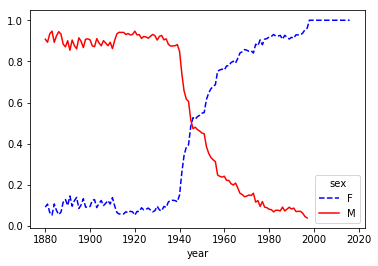

In [52]:
table.plot(style={'M': 'r-', 'F': 'b--'})